# Thompson Sampling
Thompson Sampling is a reinforcement learning algorithm used to solve the multi-armed bandit problem. It works by maintaining a probability distribution (usually Beta distribution) over the possible reward of each action (or ad, in CTR problems). At each round, it randomly samples from these distributions and selects the action with the highest sampled value. Over time, it balances exploration (trying less certain actions) and exploitation (choosing the best-known action), making it efficient for problems like online advertising, recommendation systems, and clinical trials.

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Parameters

In [3]:
N = dataset.shape[0]   # Number of rounds (10,000)
d = dataset.shape[1]   # Number of ads (10)

## Tracking variables


In [4]:
ads_selected = []
n_rewards_1 = np.zeros(d)   # number of times ad i got reward 1
n_rewards_0 = np.zeros(d)   # number of times ad i got reward 0
total_reward = 0

## Implementing Thompson Sampling Algorithm

In [5]:
for n in range(N):
    ad = 0
    max_random = 0
    for i in range(d):
        # Draw a sample from the Beta distribution
        random_beta = np.random.beta(n_rewards_1[i] + 1, n_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        n_rewards_1[ad] += 1
    else:
        n_rewards_0[ad] += 1
    total_reward += reward

## Results & Analysis

In [6]:
print("Total Reward obtained:", total_reward)

Total Reward obtained: 2554


## Visualising the results - Histogram

C:\Users\User\AppData\Local\Temp\ipykernel_4832\2356885151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ads_selected, palette="viridis")


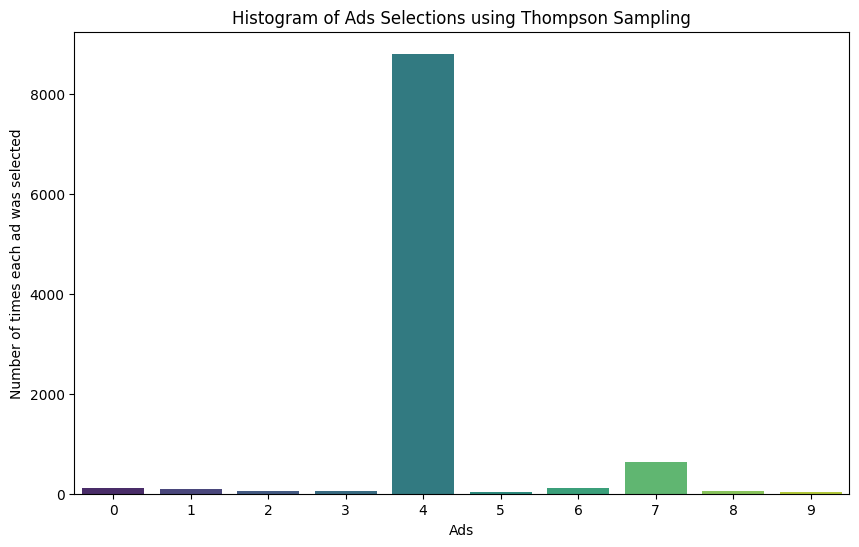

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x=ads_selected, palette="viridis")
plt.title("Histogram of Ads Selections using Thompson Sampling")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()

## Advanced Insights

### Calculate empirical CTR for each ad

In [8]:
ctr_estimates = n_rewards_1 / (n_rewards_1 + n_rewards_0)
results = pd.DataFrame({
    "Ad": np.arange(1, d+1),
    "Selected Count": np.bincount(ads_selected, minlength=d),
    "Reward 1s": n_rewards_1.astype(int),
    "Reward 0s": n_rewards_0.astype(int),
    "Estimated CTR": ctr_estimates
}).sort_values(by="Estimated CTR", ascending=False)

print("\nDetailed Results per Ad:")
print(results)


Detailed Results per Ad:
   Ad  Selected Count  Reward 1s  Reward 0s  Estimated CTR
4   5            8802       2366       6436       0.268803
7   8             635        131        504       0.206299
0   1             117         16        101       0.136752
6   7             105         13         92       0.123810
1   2              87         10         77       0.114943
8   9              62          6         56       0.096774
2   3              61          5         56       0.081967
3   4              61          5         56       0.081967
9  10              34          1         33       0.029412
5   6              36          1         35       0.027778


## Visualization of CTR estimates

C:\Users\User\AppData\Local\Temp\ipykernel_4832\2726198020.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ad", y="Estimated CTR", data=results, palette="magma")


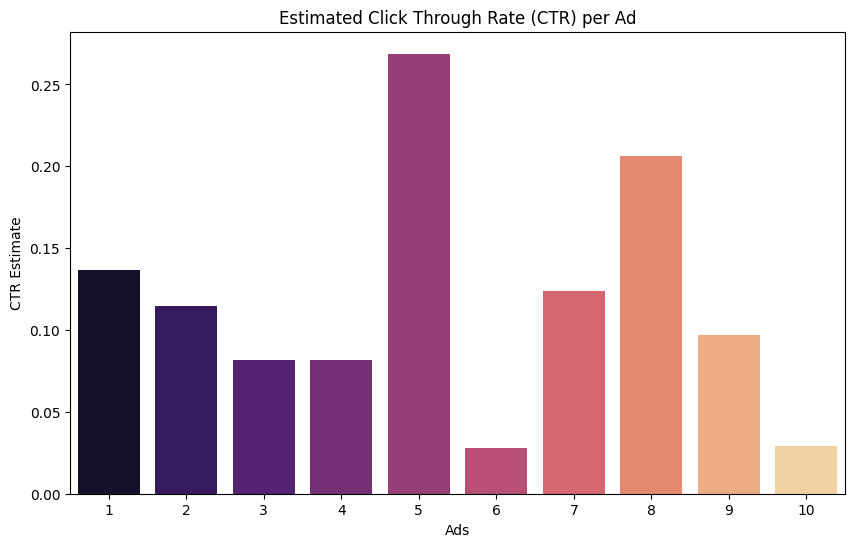

In [9]:

plt.figure(figsize=(10,6))
sns.barplot(x="Ad", y="Estimated CTR", data=results, palette="magma")
plt.title("Estimated Click Through Rate (CTR) per Ad")
plt.xlabel("Ads")
plt.ylabel("CTR Estimate")
plt.show()